### PyTorch DataLoader Exercises

Welcome to the PyTorchDataLoader exercise template notebook.

There are several questions in this notebook and it's your goal to answer them by writing Python and PyTorch code.

> **Note:** There may be more than one solution to each of the exercises, don't worry too much about the *exact* right answer. Try to write some code that works first and then improve it if you can.



In [5]:
# Import necessary libraries
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import requests
from zipfile import ZipFile
from io import BytesIO
import numpy as np

# Define the path to the dataset
dataset_path = 'http://cs231n.stanford.edu/tiny-imagenet-200.zip'  # Replace with the path to your dataset

# Send a GET request to the URL
response = requests.get(dataset_path)
# Check if the request was successful
if response.status_code == 200:
    # Open the downloaded bytes and extract them
    with ZipFile(BytesIO(response.content)) as zip_file:
        zip_file.extractall('/dataset')
    print('Download and extraction complete!')



Download and extraction complete!


In [36]:
# Define transformations for the dataset
transform = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


# Load the dataset
tiny_imagenet_dataset_train = ImageFolder(root='/dataset/tiny-imagenet-200/train', transform=transform['train'])
tiny_imagenet_dataset_test = ImageFolder(root='/dataset/tiny-imagenet-200/test', transform=transform['val'])

# Create a DataLoader
dataloader_train = DataLoader(tiny_imagenet_dataset_train, batch_size=64, shuffle=True)
dataloader_test = DataLoader(tiny_imagenet_dataset_test, batch_size=64, shuffle=True)

# Determine the number of classes and samples
num_classes = len(tiny_imagenet_dataset_train.classes)
num_samples = len(tiny_imagenet_dataset_train)

print(f'Number of classes: {num_classes}')
print(f'Number of samples: {num_samples}')

Number of classes: 200
Number of samples: 100000


In [39]:
# Function to denormalize image for visualization
def denormalize(image):
    image = image.to('cpu').numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = image * std + mean
    image = np.clip(image, 0, 1)
    return image

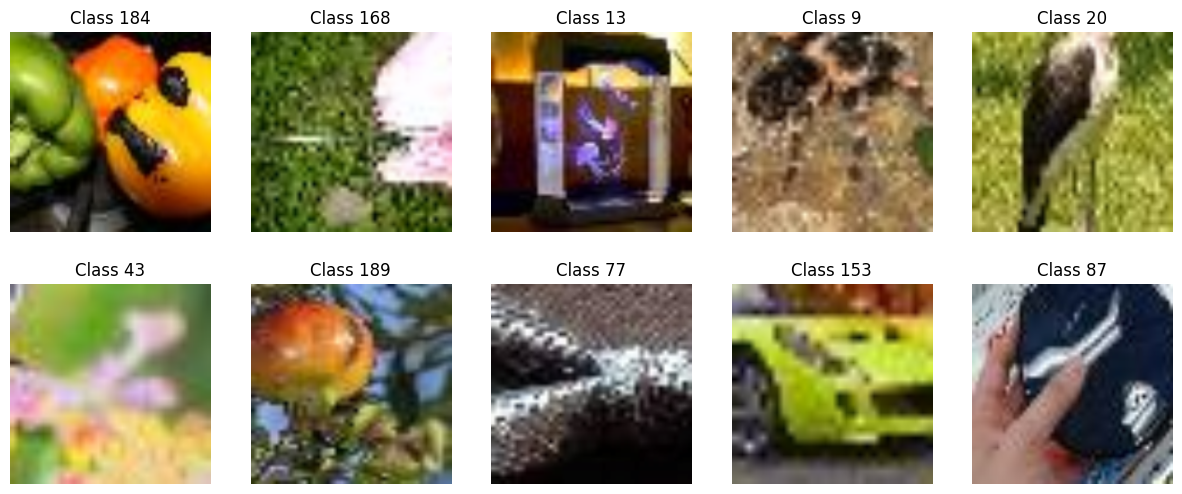

In [40]:
# Visualize one example for each class for 10 classes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
classes_sampled = []
found_classes = 0
subplot_idx = 0
for i, (inputs, classes) in enumerate(dataloader_train):
  if classes[0] not in classes_sampled:
      classes_sampled.append(classes[0])

      row_idx = subplot_idx // 5
      col_idx = subplot_idx % 5
      # Plot the image in the right subplot
      ax = axes[row_idx, col_idx]
      ax.imshow(denormalize(inputs[0]))
      ax.axis('off')
      ax.set_title(f"Class {classes[0]}")
      subplot_idx += 1
      if subplot_idx >= 10:
          break

plt.show()